In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_grafico = pd.read_excel('processed/processed_data.xlsx')
df_grafico.head()

,TIPO SEGURO,SEXO,EDAD,CAUSA A (CIE-X),ubigeo_inei,macroregion_inei,MES,CAUSA,TEMP,HR,...,Lugar_de_consulta,Tiempo_total_espera_minutos,Motivo_no_atencion,Tiempo_espera_final_minutos,departamento_provincia,Calidad_vivienda,Calidad_servicio_agua,departamento,provincia,distrito
0,ESSALUD,FEMENINO,88,J960,150128,LIMA METROPOLITANA,10,INSUFICIENCIA RESPIRATORIA AGUDA,12.133143,44.593871,...,No buscó atención,0,Sin razón específica,0,1501,Media,Alta,LIMA,LIMA,RIMAC
1,SIS,FEMENINO,75,J960,40413,SUR,5,INSUFICIENCIA RESPIRATORIA AGUDA,4.963183,45.591855,...,No buscó atención,0,Sin razón específica,0,404,Baja,Alta,AREQUIPA,CASTILLA,URACA
2,ESSALUD,FEMENINO,48,J960,40201,SUR,10,INSUFICIENCIA RESPIRATORIA AGUDA,5.674916,33.935498,...,Farmacia o botica,0,Sin razón específica,0,402,Alta,Baja,AREQUIPA,CAMANA,CAMANA
3,ESSALUD,FEMENINO,68,J960,40129,SUR,10,INSUFICIENCIA RESPIRATORIA AGUDA,5.674916,33.935498,...,No buscó atención,0,Sin razón específica,0,401,Media,Media,AREQUIPA,AREQUIPA,JOSE LUIS BUSTAMANTE Y RIVERO
4,ESSALUD,MASCULINO,90,J960,150140,LIMA METROPOLITANA,11,INSUFICIENCIA RESPIRATORIA AGUDA,12.387783,50.291238,...,No buscó atención,0,Sin razón específica,0,1501,Media,Alta,LIMA,LIMA,SANTIAGO DE SURCO


In [6]:
df_grafico.columns

Index(['TIPO SEGURO', 'SEXO', 'EDAD', 'CAUSA A (CIE-X)', 'ubigeo_inei',
       'macroregion_inei', 'MES', 'CAUSA', 'TEMP', 'HR', 'PP', 'Estacion',
       'DOMINIO_x', 'ESTRATO_x',
       '¿Los medicamentos que usted ha tomado fueron : Administración de oxígeno?',
       '¿Ha tomado medicamentos por prevención o como parte de un tratamiento para el covid-',
       'Lugar_de_consulta', 'Tiempo_total_espera_minutos',
       'Motivo_no_atencion', 'Tiempo_espera_final_minutos',
       'departamento_provincia', 'Calidad_vivienda', 'Calidad_servicio_agua',
       'departamento', 'provincia', 'distrito'],
      dtype='object')

# Grafico 1

In [7]:
# Convertir las variables categóricas utilizando One-Hot Encoding
df_encoded = pd.get_dummies(df_grafico, columns=['Calidad_vivienda', 'Calidad_servicio_agua'],dtype=int)

# Verificar el resultado
df_encoded.head()

,TIPO SEGURO,SEXO,EDAD,CAUSA A (CIE-X),ubigeo_inei,macroregion_inei,MES,CAUSA,TEMP,HR,...,departamento_provincia,departamento,provincia,distrito,Calidad_vivienda_Alta,Calidad_vivienda_Baja,Calidad_vivienda_Media,Calidad_servicio_agua_Alta,Calidad_servicio_agua_Baja,Calidad_servicio_agua_Media
0,ESSALUD,FEMENINO,88,J960,150128,LIMA METROPOLITANA,10,INSUFICIENCIA RESPIRATORIA AGUDA,12.133143,44.593871,...,1501,LIMA,LIMA,RIMAC,0,0,1,1,0,0
1,SIS,FEMENINO,75,J960,40413,SUR,5,INSUFICIENCIA RESPIRATORIA AGUDA,4.963183,45.591855,...,404,AREQUIPA,CASTILLA,URACA,0,1,0,1,0,0
2,ESSALUD,FEMENINO,48,J960,40201,SUR,10,INSUFICIENCIA RESPIRATORIA AGUDA,5.674916,33.935498,...,402,AREQUIPA,CAMANA,CAMANA,1,0,0,0,1,0
3,ESSALUD,FEMENINO,68,J960,40129,SUR,10,INSUFICIENCIA RESPIRATORIA AGUDA,5.674916,33.935498,...,401,AREQUIPA,AREQUIPA,JOSE LUIS BUSTAMANTE Y RIVERO,0,0,1,0,0,1
4,ESSALUD,MASCULINO,90,J960,150140,LIMA METROPOLITANA,11,INSUFICIENCIA RESPIRATORIA AGUDA,12.387783,50.291238,...,1501,LIMA,LIMA,SANTIAGO DE SURCO,0,0,1,1,0,0


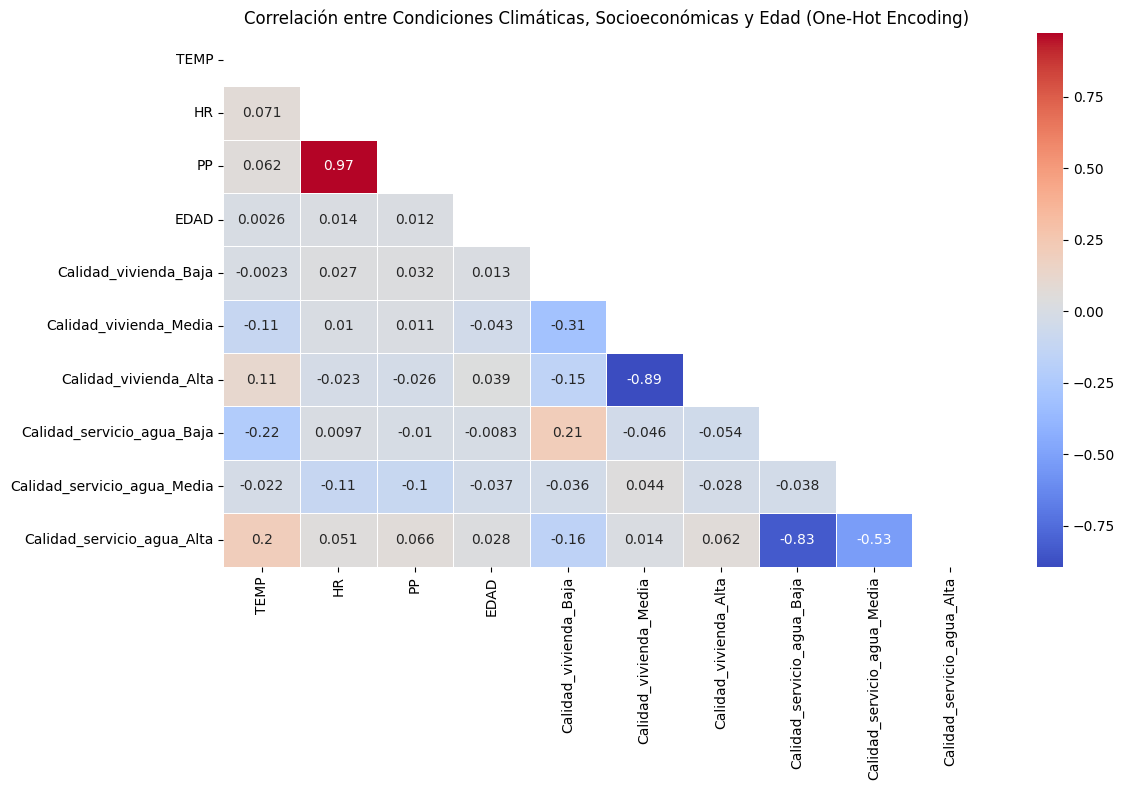

In [8]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_encoded[['TEMP', 'HR','PP', 'EDAD', 'Calidad_vivienda_Baja','Calidad_vivienda_Media', 'Calidad_vivienda_Alta',
                                 'Calidad_servicio_agua_Baja','Calidad_servicio_agua_Media', 'Calidad_servicio_agua_Alta']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=np.triu(correlation_matrix))
plt.title('Correlación entre Condiciones Climáticas, Socioeconómicas y Edad (One-Hot Encoding)')
plt.tight_layout()
plt.show()


El análisis de la matriz de correlación entre las condiciones climáticas, socioeconómicas y la edad de fallecimiento revela importantes hallazgos para este estudio. Se observa una correlación alta y positiva (0.97) entre la precipitación (PP) y la humedad relativa (HR), lo cual es esperable y relevante, dado que altos niveles de humedad podrían agravar las enfermedades respiratorias en ciertas regiones. Además, la calidad del servicio de agua muestra una correlación negativa con la temperatura, especialmente en áreas con servicio de agua de baja calidad (-0.22), lo que sugiere que las regiones más frías podrían tener un acceso limitado a agua de calidad. Las viviendas de mayor calidad presentan correlaciones negativas con la calidad del servicio de agua baja (-0.89), lo cual indica que aquellas con mejores condiciones habitacionales suelen coincidir con mejores servicios básicos. Sin embargo, la edad de fallecimiento muestra correlaciones bajas con las otras variables, sugiriendo que, aunque las condiciones externas afectan la salud, la edad podría depender más de factores individuales o médicos. Estos hallazgos destacan la importancia de considerar cómo las condiciones de vivienda y los servicios básicos interactúan con las variables climáticas para influir en la mortalidad por enfermedades respiratorias, alineándose con los objetivos del proyecto de evaluar el impacto de estos factores en la salud de la población peruana.

# Real

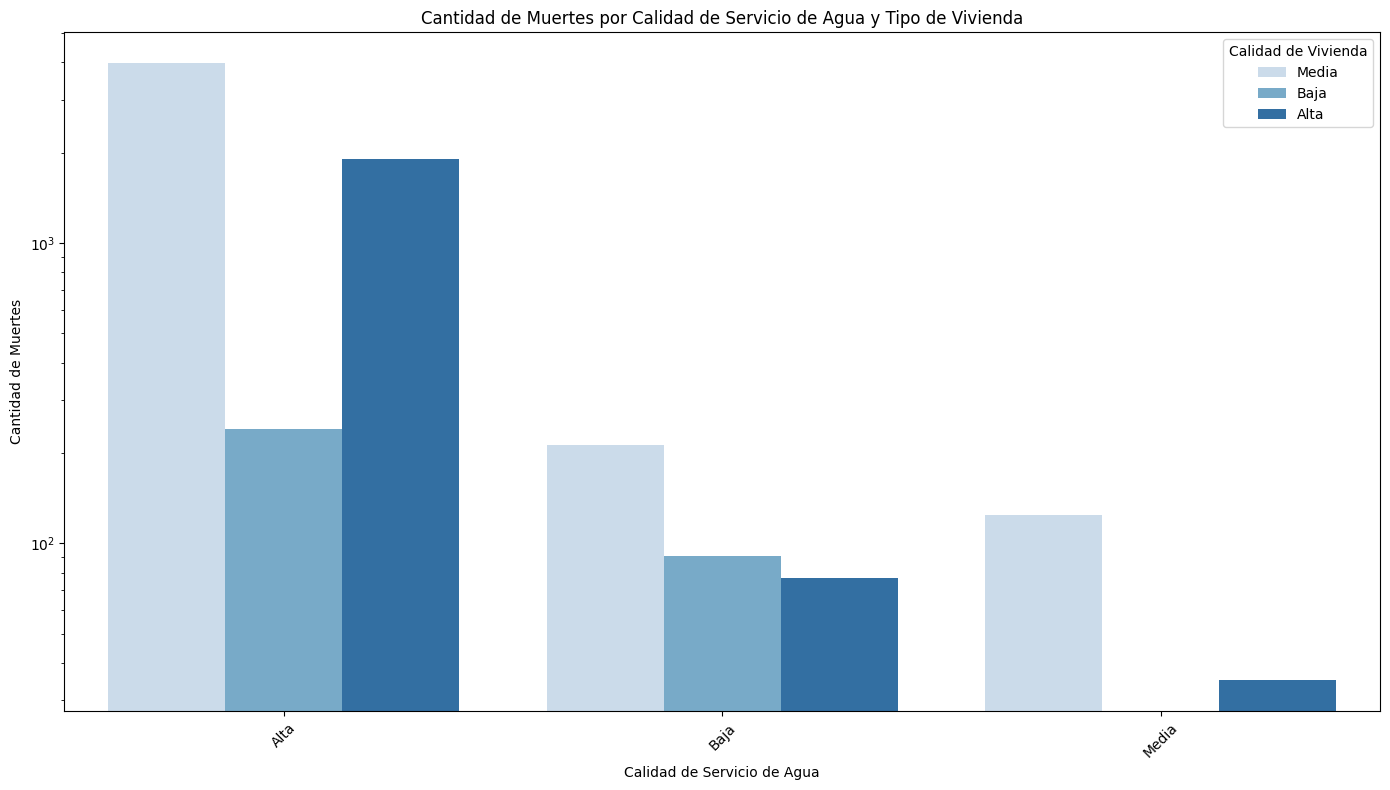

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras de mortalidad por calidad de agua y tipo de vivienda
plt.figure(figsize=(14, 8))
sns.countplot(data=df_grafico, x='Calidad_servicio_agua', hue='Calidad_vivienda', palette='Blues')
plt.title('Cantidad de Muertes por Calidad de Servicio de Agua y Tipo de Vivienda')
plt.xlabel('Calidad de Servicio de Agua')
plt.ylabel('Cantidad de Muertes')
plt.yscale('log')
plt.xticks(rotation=45)
plt.legend(title='Calidad de Vivienda')
plt.tight_layout()
plt.show()


El gráfico que muestra la cantidad de muertes según la calidad del servicio de agua y el tipo de vivienda destaca cómo estas variables interactúan en la mortalidad por enfermedades respiratorias. Se observa que la mayoría de las muertes se concentran en viviendas de calidad alta y media con servicios de agua de buena calidad, lo que podría estar relacionado con una mayor capacidad de registro y acceso a sistemas de salud en estas áreas. En contraste, las viviendas de menor calidad y con servicios de agua deficientes presentan un número significativamente menor de muertes, lo que podría indicar un subregistro de casos en comunidades con menos recursos y acceso limitado a servicios de salud. Estos hallazgos refuerzan la importancia de considerar tanto la infraestructura de servicios básicos como las condiciones habitacionales al evaluar los factores que influyen en la mortalidad por enfermedades respiratorias, subrayando la necesidad de políticas que mejoren las condiciones de vida y el acceso equitativo a servicios de salud en poblaciones vulnerables.

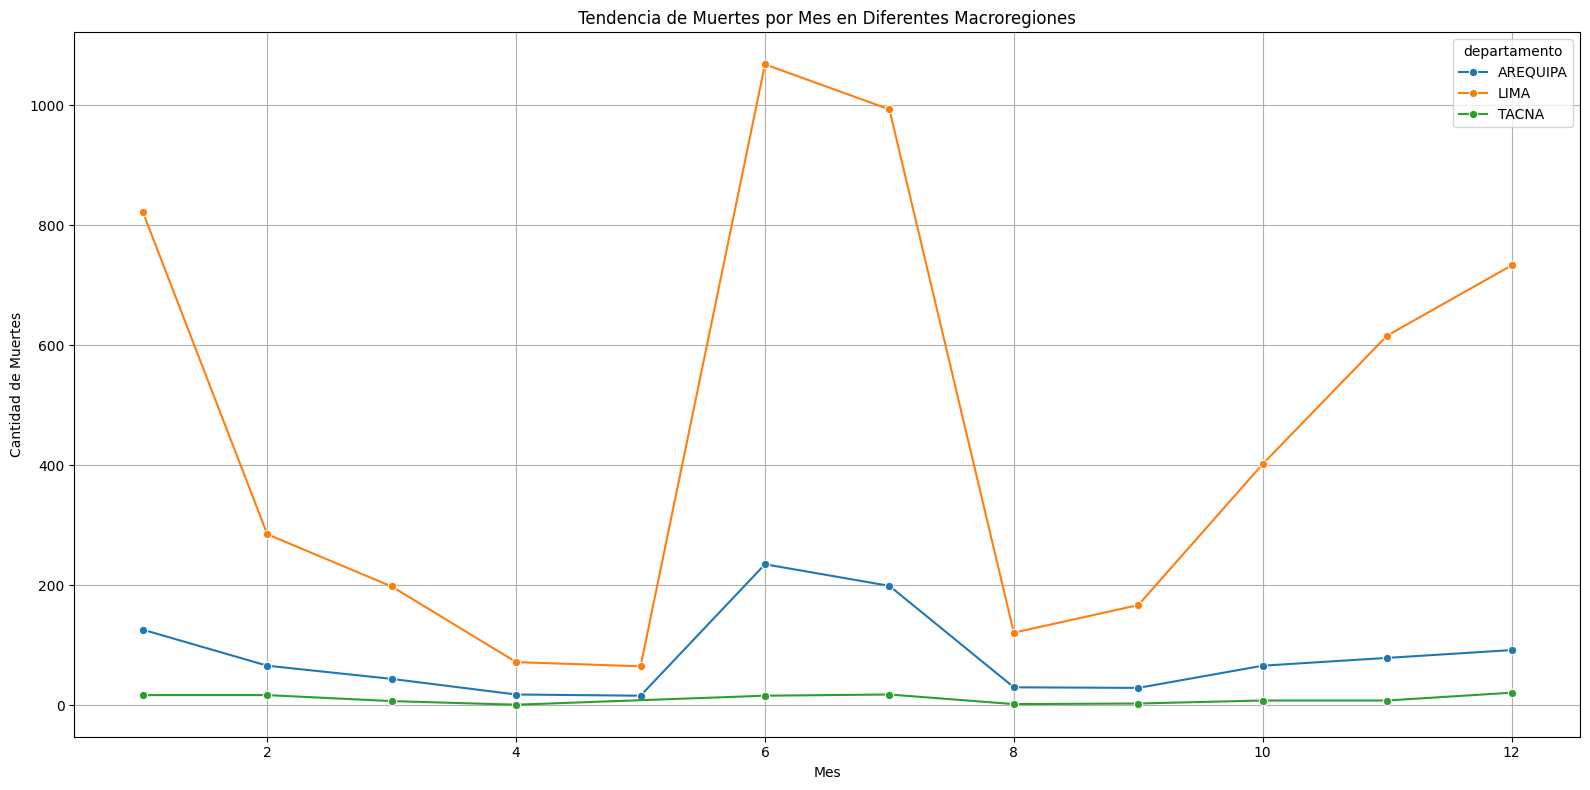

In [10]:
# Crear un DataFrame con la cantidad de muertes por mes y macroregión
df_monthly_macroregion = df_grafico.groupby(['MES', 'departamento']).size().reset_index(name='Cantidad_Muertes')

# Gráfico de líneas de muertes por mes en diferentes macroregiones
plt.figure(figsize=(16, 8))
sns.lineplot(data=df_monthly_macroregion, x='MES', y='Cantidad_Muertes', hue='departamento', marker='o', palette='tab10')
plt.title('Tendencia de Muertes por Mes en Diferentes Macroregiones')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Muertes')
plt.grid(True)
plt.tight_layout()
plt.show()


El gráfico de línea que muestra la tendencia de muertes por mes en diferentes departamentos destaca las variaciones estacionales y regionales en la mortalidad por enfermedades respiratorias. Se observa que el departamento de Lima presenta picos significativos de mortalidad al inicio y al final del año, lo cual podría estar asociado a cambios estacionales y condiciones climáticas específicas que afectan la salud respiratoria. Por otro lado, Arequipa muestra un patrón más moderado, con fluctuaciones a mitad de año, mientras que Tacna mantiene un nivel de mortalidad relativamente bajo y constante a lo largo de los meses. Estos hallazgos refuerzan la importancia de considerar las diferencias regionales en el diseño de políticas de salud pública, ya que cada región puede enfrentar desafíos particulares en términos de condiciones ambientales y acceso a servicios de salud. Este análisis se alinea con los objetivos del proyecto al resaltar la necesidad de medidas específicas que aborden las disparidades en la mortalidad y prioricen intervenciones durante los meses de mayor incidencia en cada región.

In [16]:
df_hist = df_grafico[df_grafico['Tiempo_espera_final_minutos'] != 0]
df_hist

,TIPO SEGURO,SEXO,EDAD,CAUSA A (CIE-X),ubigeo_inei,macroregion_inei,MES,CAUSA,TEMP,HR,...,Lugar_de_consulta,Tiempo_total_espera_minutos,Motivo_no_atencion,Tiempo_espera_final_minutos,departamento_provincia,Calidad_vivienda,Calidad_servicio_agua,departamento,provincia,distrito
35,SIS,FEMENINO,47,J960,150135,LIMA METROPOLITANA,1,INSUFICIENCIA RESPIRATORIA AGUDA,11.054167,86.122984,...,"Posta, policlínico, EsSalud",5,Sin razón específica,120,1501,Alta,Alta,LIMA,LIMA,SAN MARTIN DE PORRES
83,ESSALUD,FEMENINO,77,J969,150143,LIMA METROPOLITANA,6,INSUFICIENCIA RESPIRATORIA,10.500977,44.130127,...,Puesto de salud MINSA,4320,Sin razón específica,20,1501,Media,Alta,LIMA,LIMA,VILLA MARIA DEL TRIUNFO
88,SIS,MASCULINO,95,J80X,150121,LIMA METROPOLITANA,1,SINDROME DE DIFICULTAD RESPIRATORIO DEL ADULTO,11.054167,86.122984,...,"Posta, policlínico, EsSalud",10080,Sin razón específica,180,1501,Alta,Alta,LIMA,LIMA,PUEBLO LIBRE
134,SIS,MASCULINO,44,J960,150133,LIMA METROPOLITANA,8,INSUFICIENCIA RESPIRATORIA AGUDA,11.421801,42.442704,...,Otro,14400,Sin razón específica,30,1501,Media,Alta,LIMA,LIMA,SAN JUAN DE MIRAFLORES
137,ESSALUD,FEMENINO,82,J960,150121,LIMA METROPOLITANA,1,INSUFICIENCIA RESPIRATORIA AGUDA,11.054167,86.122984,...,"Posta, policlínico, EsSalud",10080,Sin razón específica,180,1501,Alta,Alta,LIMA,LIMA,PUEBLO LIBRE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6580,SIS,MASCULINO,89,J960,230104,SUR,11,INSUFICIENCIA RESPIRATORIA AGUDA,10.402833,37.667256,...,Otro,120,Sin razón específica,120,2301,Media,Alta,TACNA,TACNA,CIUDAD NUEVA
6597,SIS,MASCULINO,16,J960,150142,LIMA METROPOLITANA,4,INSUFICIENCIA RESPIRATORIA AGUDA,11.665605,80.466104,...,Otro,5,Sin razón específica,5,1501,Media,Alta,LIMA,LIMA,VILLA EL SALVADOR
6616,ESSALUD,MASCULINO,89,J960,150133,LIMA METROPOLITANA,1,INSUFICIENCIA RESPIRATORIA AGUDA,11.054167,86.122984,...,Farmacia o botica,43200,Sin razón específica,120,1501,Alta,Alta,LIMA,LIMA,SAN JUAN DE MIRAFLORES
6641,ESSALUD,MASCULINO,72,J969,230101,SUR,1,INSUFICIENCIA RESPIRATORIA,9.858871,77.819892,...,Otro,60,Sin razón específica,30,2301,Media,Alta,TACNA,TACNA,TACNA


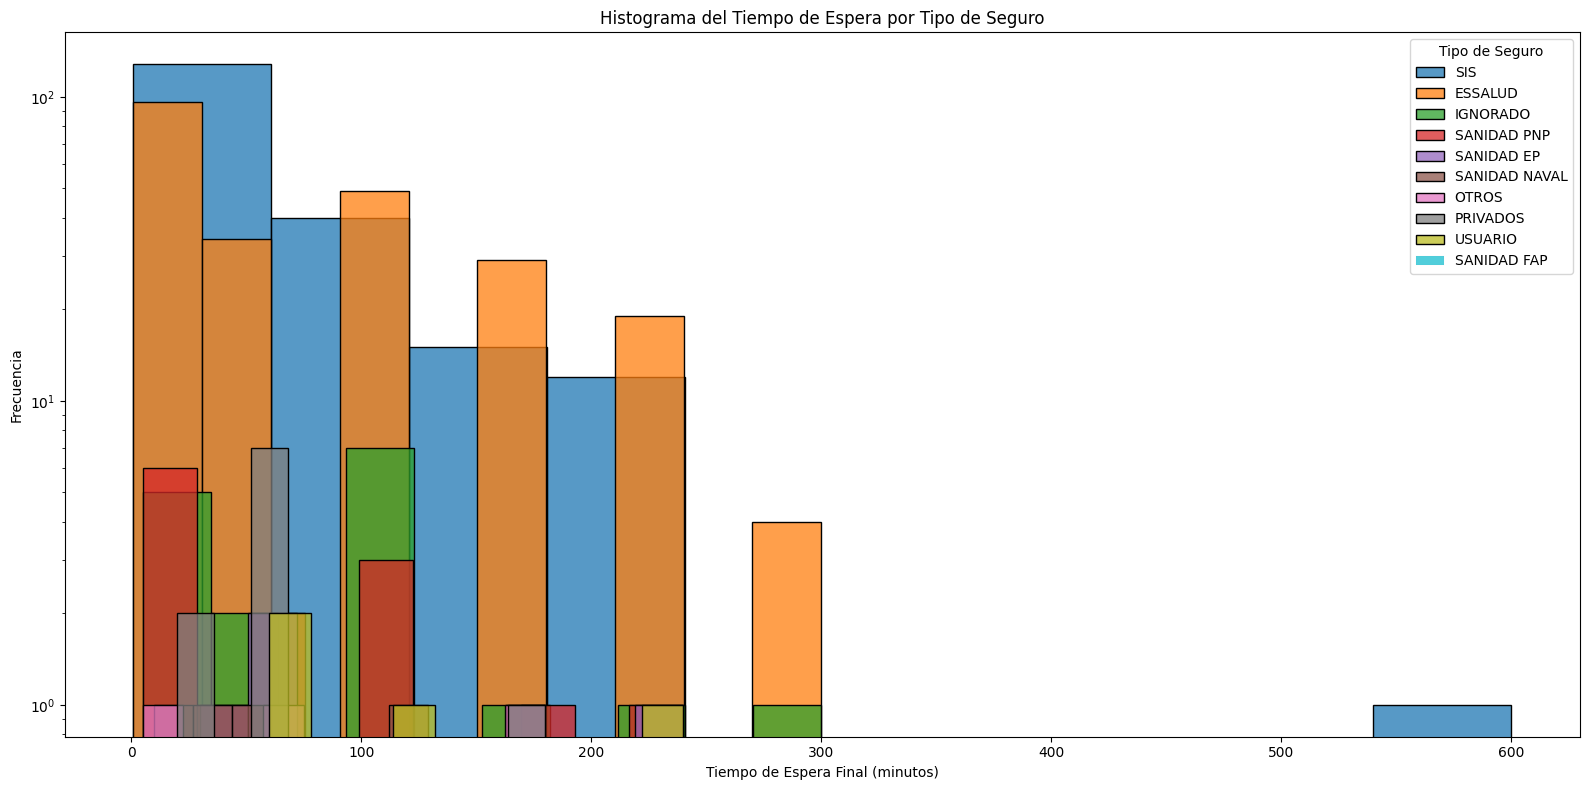

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener la lista de tipos de seguro únicos
tipos_seguro = df_hist['TIPO SEGURO'].unique()

# Crear una figura para el histograma
plt.figure(figsize=(16, 8))

# Iterar sobre cada tipo de seguro y plotear su histograma
for seguro in tipos_seguro:
    df_seguro = df_hist[df_hist['TIPO SEGURO'] == seguro]
    sns.histplot(
        data=df_seguro,
        x='Tiempo_espera_final_minutos',
        kde=False,
        label=seguro,
        bins=10 # Número fijo de bins, ajusta si es necesario
    )

# Configurar los títulos y etiquetas
plt.title('Histograma del Tiempo de Espera por Tipo de Seguro')
plt.xlabel('Tiempo de Espera Final (minutos)')
plt.ylabel('Frecuencia')
plt.legend(title='Tipo de Seguro')
#plt.xscale('log')  # Aplicar escala logarítmica si es necesario
plt.yscale('log')  # Aplicar escala logarítmica si es necesario

# Mostrar el gráfico
plt.tight_layout()
plt.show()



El histograma del tiempo de espera por tipo de seguro revela una distribución desigual en los tiempos de atención, destacando al SIS como el seguro con mayores frecuencias en tiempos prolongados, lo que indica una carga significativa en su gestión. ESSALUD también presenta alta frecuencia, aunque en un rango más moderado. Los seguros privados y otros como SANIDAD EP y PRIVADOS muestran tiempos de espera más cortos, sugiriendo un acceso más eficiente. La mayoría de los datos se concentra entre 0 y 100 minutos, con una disminución notable en frecuencias a medida que los tiempos aumentan, lo que resalta la necesidad de políticas que optimicen los tiempos de espera, especialmente en los seguros públicos, para mejorar la equidad en el acceso a la atención sanitaria.

# Opcional

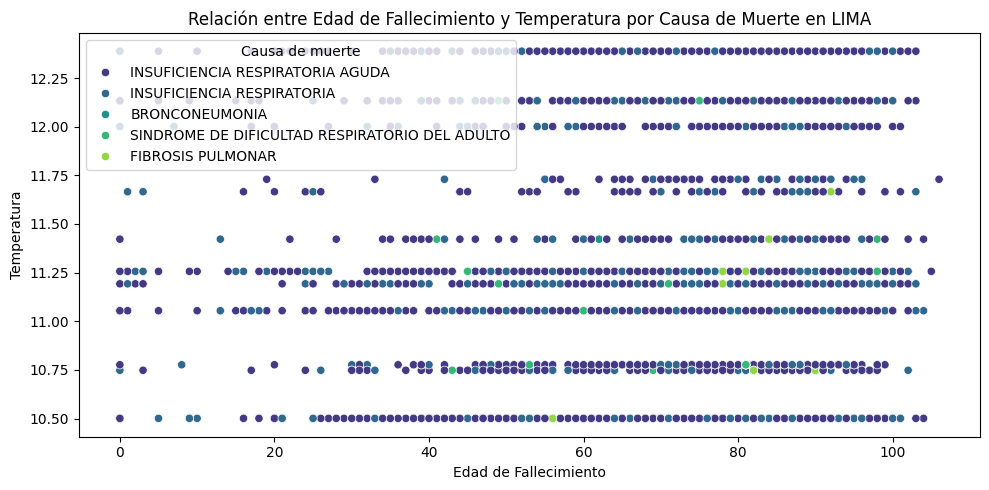

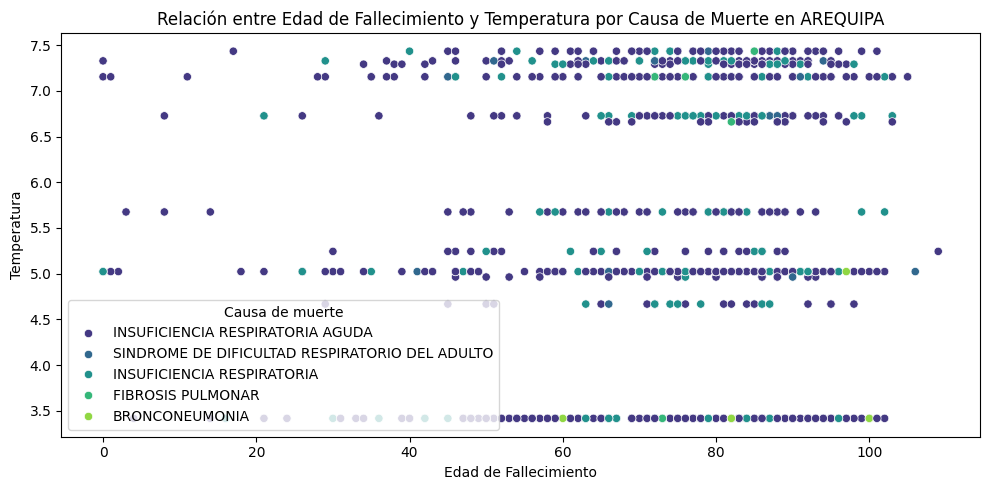

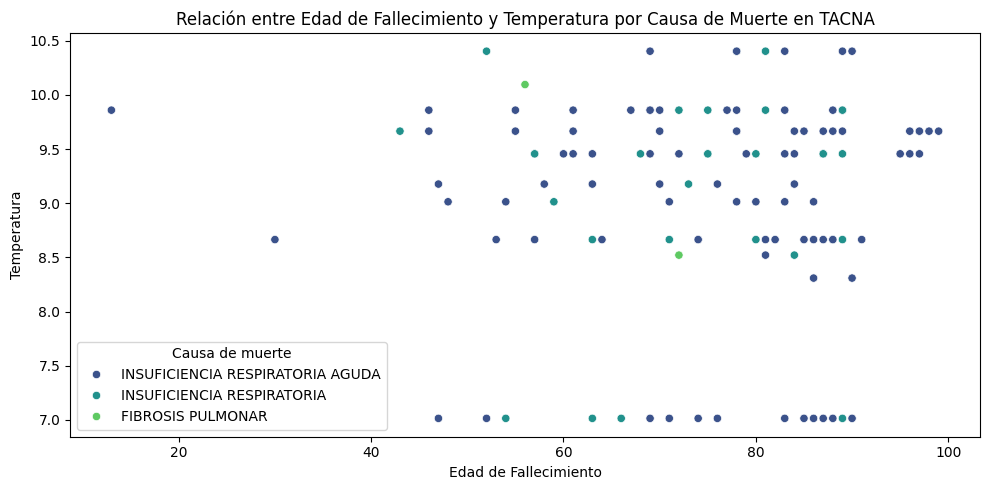

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener la lista de departamentos únicos
departamentos = df_grafico['departamento'].unique()

# Iterar sobre cada departamento y crear un gráfico de dispersión
for depto in departamentos:
    # Filtrar los datos por departamento
    df_depto = df_grafico[df_grafico['departamento'] == depto]

    # Crear el gráfico de dispersión
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df_depto, x='EDAD', y='TEMP', hue='CAUSA', palette='viridis')

    # Títulos y etiquetas
    plt.title(f'Relación entre Edad de Fallecimiento y Temperatura por Causa de Muerte en {depto}')
    plt.ylabel('Temperatura')
    plt.xlabel('Edad de Fallecimiento')
    plt.legend(title='Causa de muerte', loc='best')

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

El análisis comparativo de los gráficos de dispersión que muestran la relación entre la edad de fallecimiento y el tiempo de espera por tipo de seguro en Lima, Arequipa y Tacna revela diferencias significativas en la atención sanitaria y su impacto potencial en la mortalidad. Lima destaca por una mayor concentración de datos y una notable variabilidad en los tiempos de espera, especialmente en seguros públicos como ESSALUD y SIS, lo que sugiere un sistema de salud más saturado. Arequipa presenta una dispersión similar pero menos densa, lo que podría reflejar un menor volumen de casos o diferentes dinámicas de acceso. Por otro lado, Tacna muestra tiempos de espera más cortos y una menor densidad de puntos, sugiriendo un acceso más ágil o un menor número de casos reportados. Estos hallazgos resaltan la importancia de mejorar la gestión de los tiempos de espera en los seguros públicos y garantizar un acceso equitativo y eficiente a los servicios de salud, alineándose con los objetivos del proyecto al destacar las disparidades regionales y su posible influencia en la mortalidad por enfermedades respiratorias.